# Simple one agent model

A model which, at each time step, iterates over all combinations of a finite set of discrete speed increases/decreases and yaw rotations, which all take $\Delta T = 0.3$ s to execute, simulates the effects over a prediction interval $T_p = \Delta T$ and selects the action which maximises:

$V = -k_g v_g - k_o \sum_i 1 / \tau_i - C_v v^2 - C_t \Delta \psi^2$,

where $v_g$ is the rate of change of the distance to the goal, $\tau_i$ time to collision with obstacle $i$ (infinite if no collision course with $i$), $v$ is longitudinal speed, all three referring to the state after the prediction interval, and $\Delta \psi$ is the change in yaw rotation effectuated for the evaluated action; the rest above are model parameters.

In [1]:
# basic init
import numpy as np
import importlib
import one_agent
importlib.reload(one_agent)
x_goal = np.array([10, 10])

C:\GITHUB\COMMOTIONSFramework\first simple tests\one_agent.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  time_to_obstacle_collision = long_distance_to_obstacle / speed


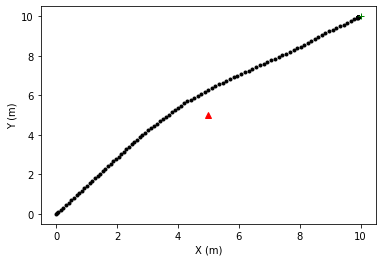

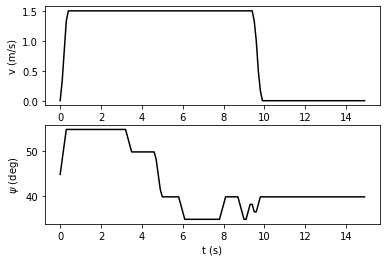

In [2]:
# just one obstacle
x_obstacles = np.array([[5, 5]])
one_agent.run_simulation(x_goal, x_obstacles)

Notice that the agent naturally decelerates to a stop once reaching the goal.

Now adding a second obstacle:

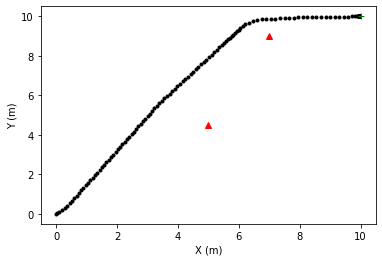

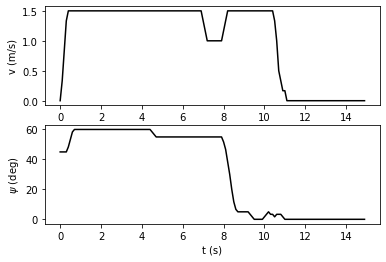

In [3]:
# two obstacles
x_obstacles = np.array([[5, 4.5], [7, 9]])
one_agent.run_simulation(x_goal, x_obstacles)

Some interesting things above, like a preference to go around rather than between the obstacles, and a slight slowing down before turning around the second obstacle, in order not to overshoot.

Increasing the reward for making progress toward the goal gives a speed increase, and in this case makes the agent take a path between the obstacles:

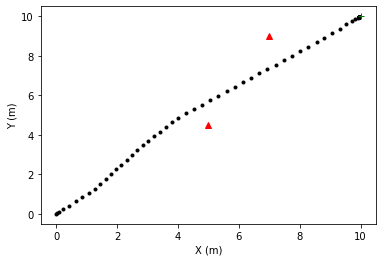

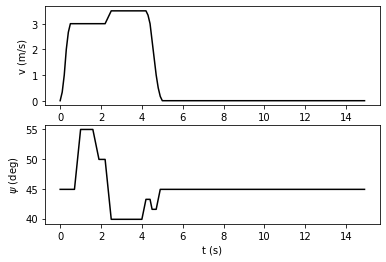

In [4]:
# increasing reward for progress toward goal
params = one_agent.get_default_params()
params["k_g"] = 2
one_agent.run_simulation(x_goal, x_obstacles, params)

# Extended to two-agent model

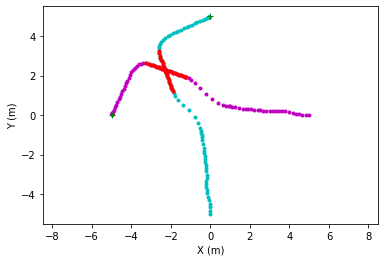

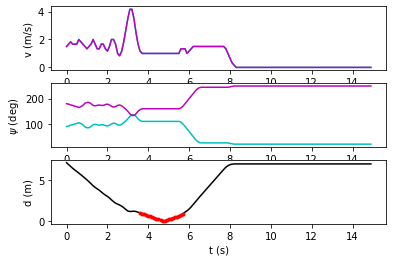

In [5]:
import multiple_agents
importlib.reload(multiple_agents)
pos_agents = np.array([[0, -5], [5, 0]])
pos_goals = np.array([[0, 5], [-5, 0]])
multiple_agents.run_simulation(pos_agents, pos_goals, speed_agents = 1.5)

C:\GITHUB\COMMOTIONSFramework\first simple tests\multiple_agents.py:117: RuntimeWarning: invalid value encountered in double_scalars
  x = -b / (2 * a)


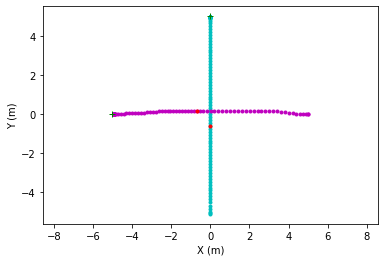

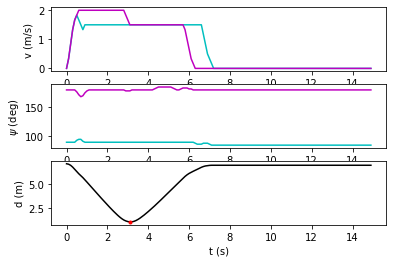

In [6]:
pos_agents = np.array([[0, -5.1], [5, 0]])
multiple_agents.run_simulation(pos_agents, pos_goals)

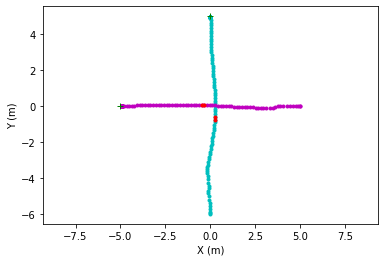

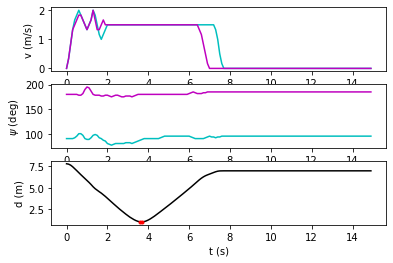

In [7]:
pos_agents = np.array([[0, -6], [5, 0]])
multiple_agents.run_simulation(pos_agents, pos_goals)

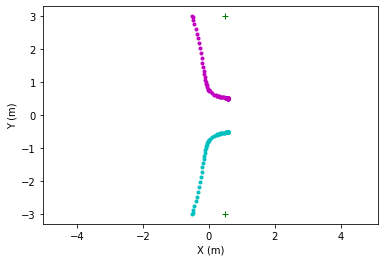

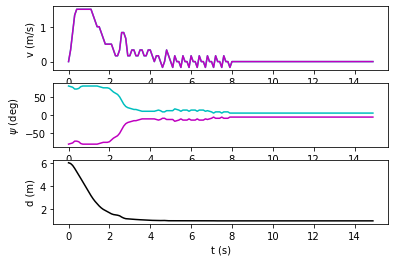

In [8]:
pos_agents = np.array([[-.5, -3], [-.5, 3]])
pos_goals = np.array([[.5, 3], [.5, -3]])
multiple_agents.run_simulation(pos_agents, pos_goals)

# Multiple agents - object oriented implementation
An attempt at recreating the exact same results as just above, in an implementation framework that might be a bit more extensible.

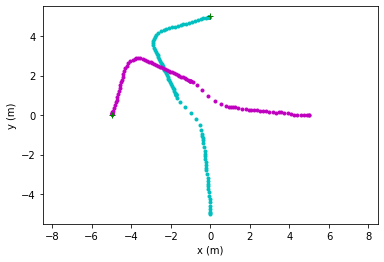

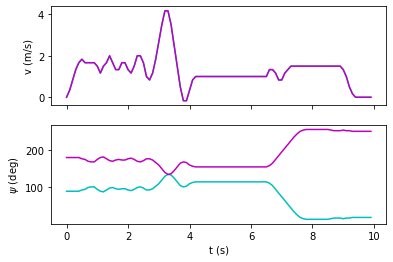

In [10]:
import importlib
import commotions
importlib.reload(commotions)
import numpy as np
import matplotlib.pyplot as plt
import multiple_agents_oo
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
# agent start/goal positions (yaw_angle = None initialises agent as oriented towards its goal)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5]), yaw_angle = None)
goal_A = np.array((0, 5))
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None)
goal_B = np.array((-5, 0))
# 
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, plot_color = 'c')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, plot_color = 'm')
#
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()                    

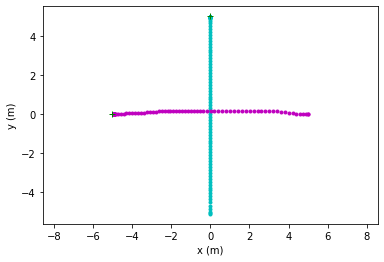

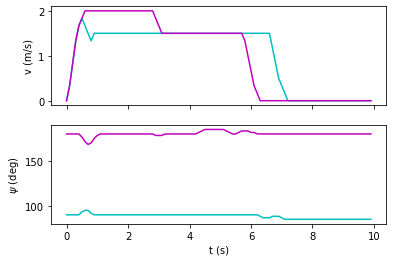

In [11]:
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5.1]), yaw_angle = None)
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None)
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, plot_color = 'c')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, plot_color = 'm')
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()  

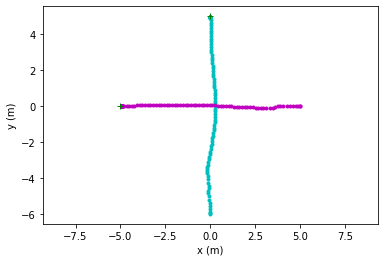

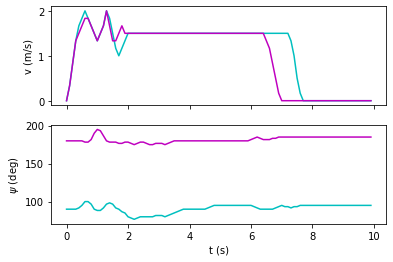

In [9]:
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
initial_state_A = commotions.KinematicState(pos = np.array([0, -6]), yaw_angle = None)
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None)
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, plot_color = 'c')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, plot_color = 'm')
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()  

So - getting the same results back as before.

# Longitudinal only version

In [2]:
import importlib
import commotions
importlib.reload(commotions)
import numpy as np
import matplotlib.pyplot as plt
import multiple_agents_oo
importlib.reload(multiple_agents_oo)

#%matplotlib inline
%matplotlib qt

test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
# agent start/goal positions (yaw_angle = None initialises agent as oriented towards its goal)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5.1]), yaw_angle = None, long_speed = 1.5)
goal_A = np.array((0, 5))
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None, long_speed = 1.5)
goal_B = np.array((-5, 0))
#
params = multiple_agents_oo.SimpleAgent.get_default_parameters()
params.deltapsis = np.array([0])
# 
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, params, plot_color = 'g')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, params, plot_color = 'c')
#
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()   